# TRANSACTIONAL DATA FOR CHURN PREDICTION
The dataset has been taken from Cran R Project, link attached below, it consists of eight separate .csv files. As part of the analysis, we will use the six. 

The dataset used is a transactional data spanning over two years of purchase transactions of 2500 households. The campaign information and other demographical information of household, which coupon was redeemed are also available. 

The file dataset are as follows:

- Campaign Descriptions (camp_dt.csv)
- Campaigns (camp_d.csv)
- Coupons (coupon.csv)
- Coupon Redemptions (coup-rd.csv)
- Transactions (trans_data.csv)
- Demographics (demo.csv)

https://cran.r-project.org/web/packages/completejourney/vignettes/completejourney.html

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading file from Google Drive
downloaded = drive.CreateFile({'id':'1PNJcQWKGddpR-bEQyRIjF0-3M36f7HSb'}) # replace the id with id of file you want to access
downloaded.GetContentFile('camp_dt.csv') 

**CAMPAIGN DESCRITION**

In [0]:
##CHECK IF DATA IS LOADED
dfs = dict()
dfs["camp_dt"] = pd.read_csv('camp_dt.csv') 

In [5]:
#CHECK IF DATA IS LOADED
dfs["camp_dt"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    27 non-null     int64 
 1   campaign_type  27 non-null     object
 2   start_date     27 non-null     object
 3   end_date       27 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [6]:
#CHECKING DATA IN TABULATED FORM
dfs["camp_dt"].head()


,campaign_id,campaign_type,start_date,end_date
0,1,Type B,3/3/2017,4/9/2017
1,2,Type B,3/8/2017,4/9/2017
2,3,Type C,3/13/2017,5/8/2017
3,4,Type B,3/29/2017,4/30/2017
4,5,Type B,4/3/2017,5/7/2017


In [0]:
#CHANGING DATA TYPE FOR START AND END DATE
dfs["camp_dt"]["end_date"] = pd.to_datetime(dfs["camp_dt"]["end_date"],
                                format="%m/%d/%Y", errors='raise')
dfs["camp_dt"]["start_date"] = pd.to_datetime(dfs["camp_dt"]["start_date"],
                                format="%m/%d/%Y", errors='raise')

In [8]:
#CHECKING IF DATA TYPE IS CHANGED
dfs["camp_dt"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    27 non-null     int64         
 1   campaign_type  27 non-null     object        
 2   start_date     27 non-null     datetime64[ns]
 3   end_date       27 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 992.0+ bytes


In [0]:
#CREATING A NEW FEATURE CAMPAIGN DURATION - IN ORDER TO CHECK WHICH CAMPAIGN WAS EXPOSED MORE
dfs["camp_dt"]["DUR"] = dfs["camp_dt"].end_date-dfs["camp_dt"].start_date

In [10]:
#CHECKING THE NEW VARIABLE - IF ADDED
dfs["camp_dt"].head()

,campaign_id,campaign_type,start_date,end_date,DUR
0,1,Type B,2017-03-03,2017-04-09,37 days
1,2,Type B,2017-03-08,2017-04-09,32 days
2,3,Type C,2017-03-13,2017-05-08,56 days
3,4,Type B,2017-03-29,2017-04-30,32 days
4,5,Type B,2017-04-03,2017-05-07,34 days


In [11]:
#CHECKING THE NEW VARIABLE DATA TYPE
dfs["camp_dt"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   campaign_id    27 non-null     int64          
 1   campaign_type  27 non-null     object         
 2   start_date     27 non-null     datetime64[ns] 
 3   end_date       27 non-null     datetime64[ns] 
 4   DUR            27 non-null     timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), timedelta64[ns](1)
memory usage: 1.2+ KB


In [0]:
#WE WANT TO CHANGE THIS TO INTEGER FOR SIMPLICITY OF OUR ANALYSIS
dfs["camp_dt"]["DUR"] = pd.to_numeric(dfs["camp_dt"]["DUR"].dt.days, downcast = 'integer')

In [13]:
#CHECKING THE DUR DTYPE AGAIN
dfs["camp_dt"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    27 non-null     int64         
 1   campaign_type  27 non-null     object        
 2   start_date     27 non-null     datetime64[ns]
 3   end_date       27 non-null     datetime64[ns]
 4   DUR            27 non-null     int16         
dtypes: datetime64[ns](2), int16(1), int64(1), object(1)
memory usage: 1.0+ KB


In [14]:
#CHECKING DATA IN TABULATED FORM
dfs["camp_dt"].head()

,campaign_id,campaign_type,start_date,end_date,DUR
0,1,Type B,2017-03-03,2017-04-09,37
1,2,Type B,2017-03-08,2017-04-09,32
2,3,Type C,2017-03-13,2017-05-08,56
3,4,Type B,2017-03-29,2017-04-30,32
4,5,Type B,2017-04-03,2017-05-07,34


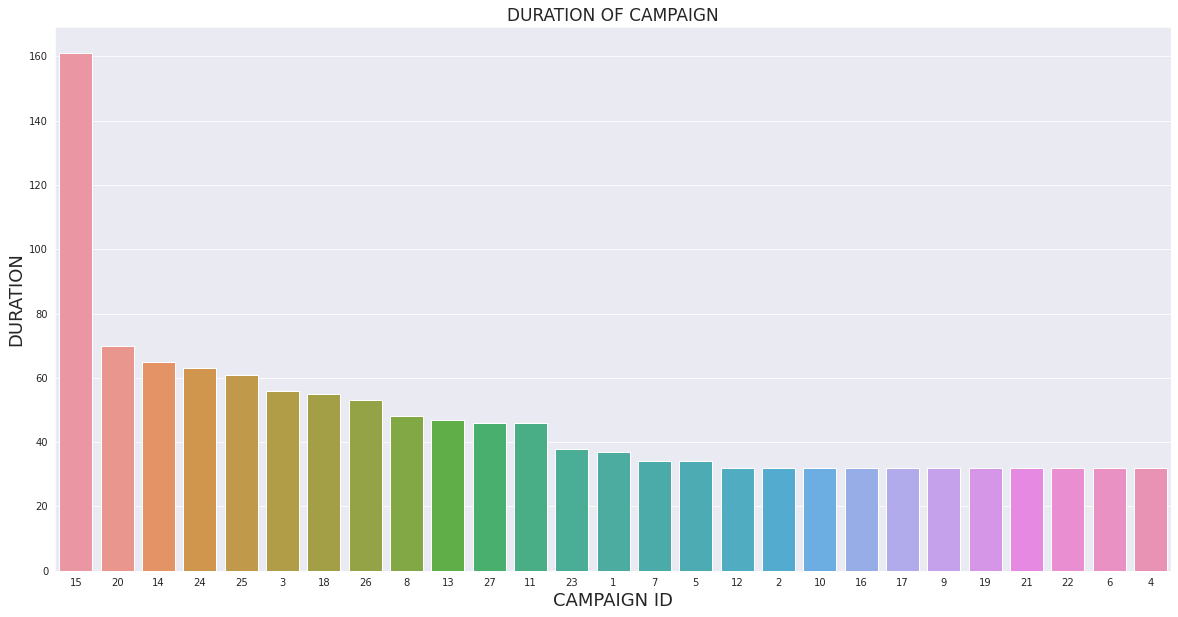

In [15]:
#CALCULATING HOW LONG A CAMPAIGN LAST FOR THE TWO YEAR
fig = plt.figure(figsize=(20,10))
sns.barplot(x="campaign_id",y="DUR", data=dfs["camp_dt"],orient="v",
            order=dfs["camp_dt"].sort_values(by="DUR", ascending=False).campaign_id.values)
plt.title('DURATION OF CAMPAIGN', fontsize=17)
plt.xlabel('CAMPAIGN ID', fontsize=18)
plt.ylabel('DURATION', fontsize=18)
plt.show()

Based on the graph, Campaign 15 lasted the long with 160 days approximately followed by Campaign 20 and Campaign 14. 
Meanwhile, the other campaigns are fairly close to each other ranging from approximately 35 to 70 days
Average campaign duration is 46.8 days (mean)

In [16]:
from numpy import mean
camp_dt_avg = sum(dfs["camp_dt"]["DUR"])/len(dfs["camp_dt"]["DUR"])

print(camp_dt_avg)

46.888888888888886


# CAMPAIGNS

In [0]:
#Reading file from Google Drive
downloaded = drive.CreateFile({'id':'1ok5TQTspB6cCk6d78QXHRyGfVjX4bxXD'}) 
downloaded.GetContentFile('camp_d.csv') 

#Reading Data
dfs["camp_d"] = pd.read_csv('camp_d.csv') 


In [18]:
#CHECK IF DATA IS LOADED
dfs["camp_d"].head()

,campaign_id,household_id,campaign_type
0,1,105,Type B
1,1,1238,Type B
2,1,1258,Type B
3,1,1483,Type B
4,1,2200,Type B


In [19]:
#CHECKING HOW MANY WERE EXPOSED TO COUPON
total_households = 2500
len(dfs["camp_d"].household_id.unique())
    
    ##Out of 2500 households, 1559 of them received a campaign once, the rest never received a campaign.

1559

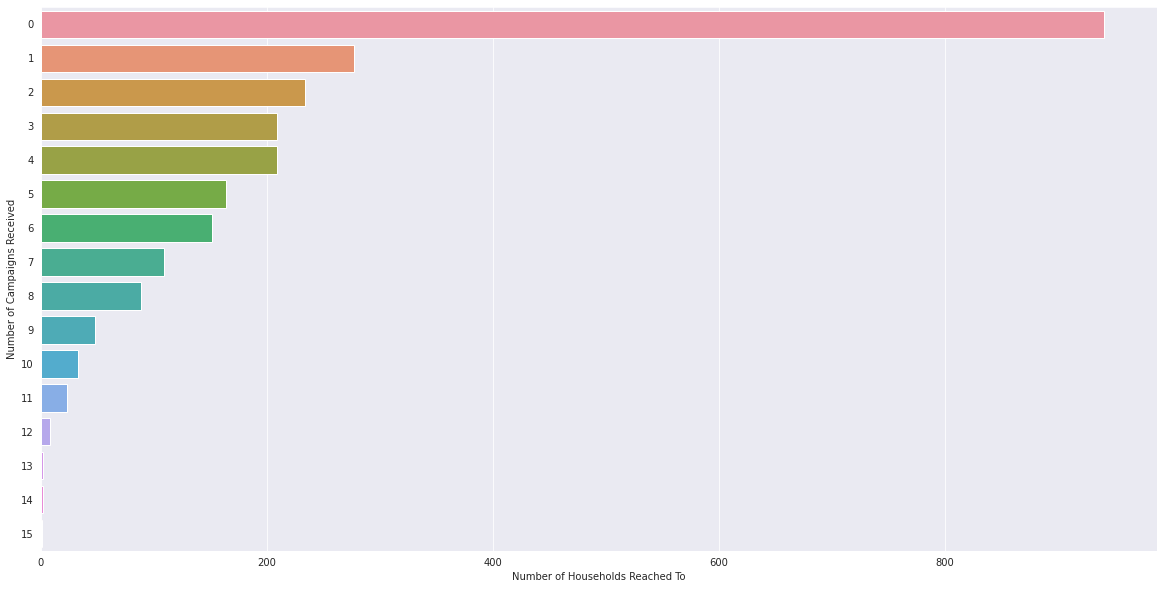

In [20]:
#CREATING & PLOTTING GRAPH IN WHICH WE CAN SEE WHICH CAMPAIGN REACHED HOW MANY HOUSES
no_of_received_campaigns_per_house = dfs["camp_d"].household_id.value_counts()
no_of_received_campaigns = no_of_received_campaigns_per_house.value_counts()
no_of_received_campaigns[0] = total_households-len(no_of_received_campaigns_per_house)
no_of_received_campaigns = pd.DataFrame(list(zip(no_of_received_campaigns.index,no_of_received_campaigns)),
                        columns=["Number of Campaigns Received",
                         "Number of Households Reached To"]).sort_values(by="Number of Campaigns Received",ascending=True)

#PLOTTING
plt.figure(figsize=(20,10))
sns.barplot(y="Number of Campaigns Received",
            x="Number of Households Reached To",
            data=no_of_received_campaigns,orient="h",
            order=no_of_received_campaigns["Number of Campaigns Received"])

plt.show()


0 shows those who didn't received campaigns.
Whereby, out of the 1559 household who received campaigns, a very small portion of the households received double-digit number of campaigns. Most frequent campaigns which were promoted was one digit campaign. The barchart below shows the households and shows counts of the group populations. 
(We will investigate how this will effect churn rates in the following sections.)

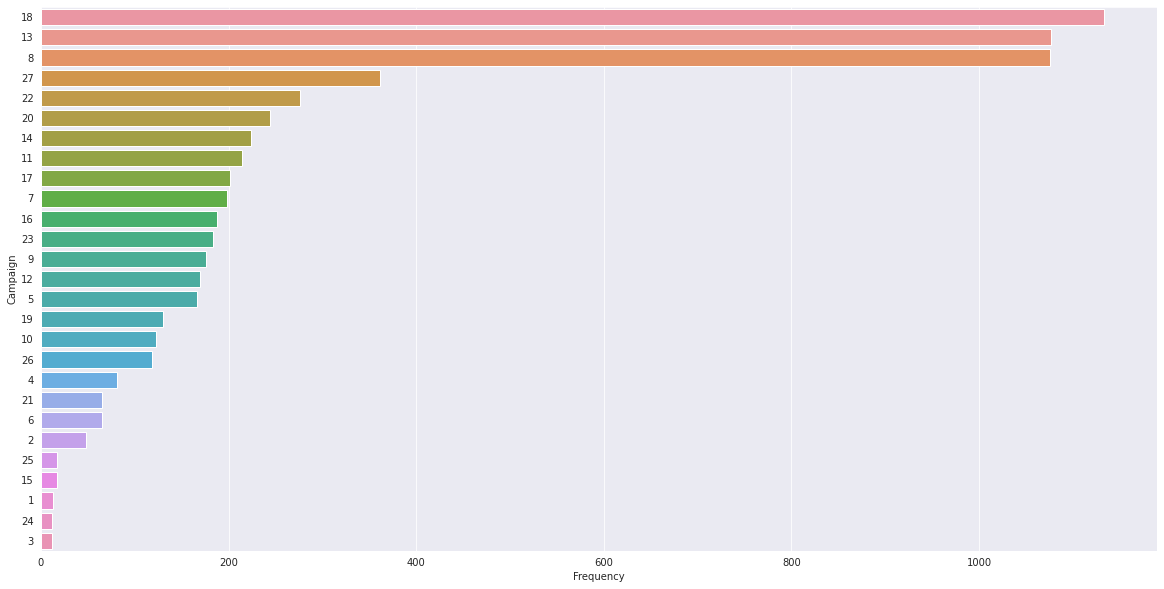

In [21]:
freq_campaigns = pd.DataFrame(list(zip(dfs["camp_d"].campaign_id.value_counts().index, 
                                       dfs["camp_d"].campaign_id.value_counts())),
                              columns=["Campaign","Frequency"])
fig = plt.figure(figsize=(20,10))
sns.barplot(y="Campaign",x="Frequency",data = freq_campaigns,orient="h",order=freq_campaigns.Campaign)

Based on the results, the bar chart above gives the most frequent campaigns. Campaign 18, 13 and 8 are the most frequent campaigns which is 1000 and more households each. 
P.S. (Frequency axis can be interpreted as unique number of households as No campaigns applied to same customer more than once).

# COUPON

Below is a lookup table which lists all the coupons sent to customers as part of a campaign, as well as the products for which each coupon is redeemable

In [0]:
#Reading file from Google Drive
downloaded = drive.CreateFile({'id':'1McrfphOcl8_W08cw4NnX7doACvvN2FgN'}) 
downloaded.GetContentFile('coupon.csv') 

#Reading Data
dfs["coupon"] = pd.read_csv('coupon.csv') 

In [23]:
#CHECK IF DATA IS LOADED
dfs["coupon"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116204 entries, 0 to 116203
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   116204 non-null  int64  
 1   coupon_upc   116204 non-null  int64  
 2   product_id   116204 non-null  float64
 3   campaign_id  116204 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.5 MB


# COUPON REDEMPTION

In [0]:
#Reading file from Google Drive
downloaded = drive.CreateFile({'id':'19uqHMpjnButoL4chDBIA9FbHAJUVwMG7'}) 
downloaded.GetContentFile('coup_red.csv') 

#Reading Data
dfs["coup_rd"] = pd.read_csv('coup_red.csv') 

In [25]:
#CHECKING DATA TYPE
dfs["coup_rd"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2102 non-null   int64 
 1   household_id     2102 non-null   int64 
 2   coupon_upc       2102 non-null   int64 
 3   campaign_id      2102 non-null   int64 
 4   redemption_date  2102 non-null   object
dtypes: int64(4), object(1)
memory usage: 82.2+ KB


In [26]:
#Checking number count of redeemed coupon
len(dfs["coup_rd"].household_id.unique())

410

Out of 2500 households, only 410 of them (16.4%) redeemed coupons within this period and they are unique. 
OR
Out of 1559 households, who were exposed to campaign(s), only 410 (26.3%) redeemed the campaign.

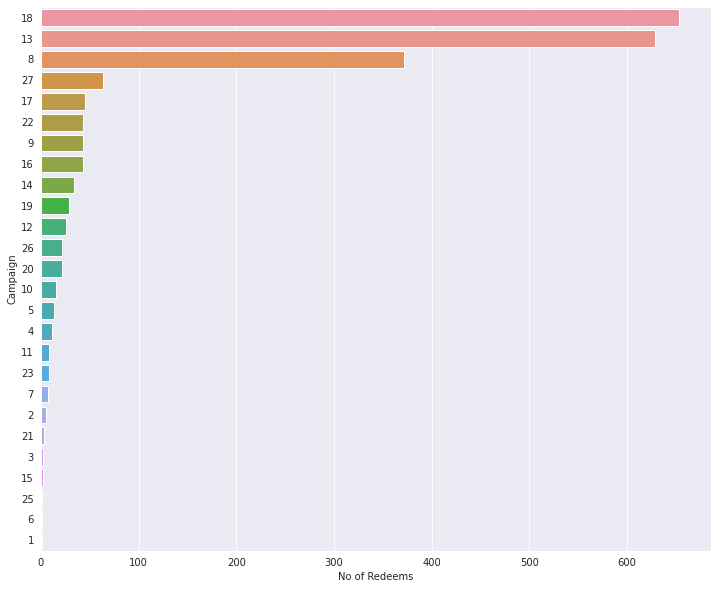

In [27]:
#Checking and Plotting most frequent campaigns
redeem_frequency = pd.DataFrame(list(zip(dfs["coup_rd"].campaign_id.value_counts().index, 
                                         dfs["coup_rd"].campaign_id.value_counts())),columns=["Campaign","No of Redeems"])
fig = plt.figure(figsize=(12,10))
sns.barplot(y="Campaign",x="No of Redeems",data = redeem_frequency,orient="h",order=redeem_frequency.Campaign)
plt.show()


Out of all the redeemed campaigns, most frequent campaigns  are 18, 13 and 8 - Type A, which attracts the most number of redeems as expected. The barchart above gives the number of redeems per campaign.

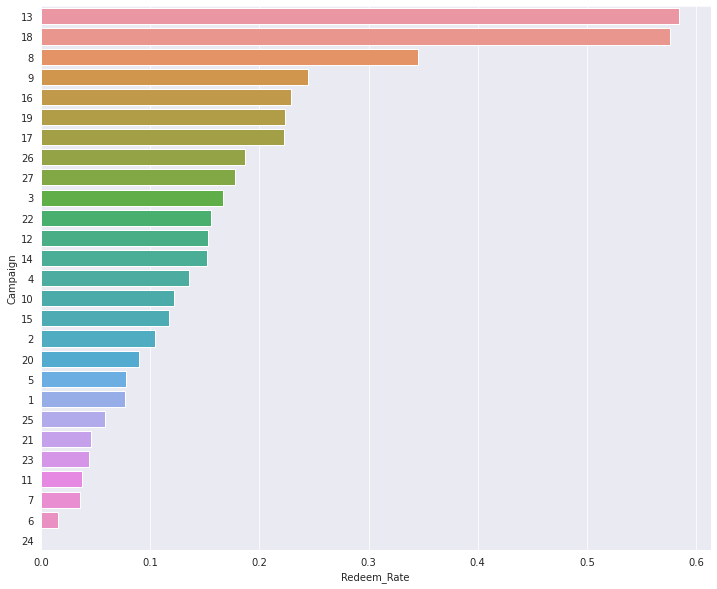

In [28]:
#Checking and Plotting most frequent campaigns in Percentage
redems_per_camp = dfs["coup_rd"].campaign_id.value_counts().sort_values()/dfs["camp_d"].campaign_id.value_counts().sort_values()
redems_per_camp = pd.DataFrame(list(zip(redems_per_camp.index,redems_per_camp)),columns=["Campaign","Redeem_Rate"]).sort_values(by="Redeem_Rate",ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(y="Campaign",x="Redeem_Rate",data=redems_per_camp,orient="h",order=redems_per_camp.Campaign)
plt.show()

The barchart above gives the redeem rates of each campaign in a descending order. Campaign 13 and 18 are clearly have higher redeem rates (~60%) as compared to the rest of campaigns.

Based on these results, campaign organisers did well by promoting the right campaigns 13 and 18 more frequently.

# TRANSACTIONAL DATA

In [0]:
#Reading file from Google Drive
downloaded = drive.CreateFile({'id':'1Esp5wiG_0G5ZRrvGVxy-W6zw3e7KKR6A'}) 
downloaded.GetContentFile('transaction.csv') 

#Reading Data
dfs["trans_data"] = pd.read_csv('transaction.csv') 

In [30]:
#Checking Data
dfs["trans_data"].head()

,Unnamed: 0,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp
0,1,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26
1,2,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,2017-01-01 07:10:28
2,3,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30
3,4,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,2017-01-01 07:30:27
4,5,906,319,3.119871e+10,1053875.0,2,2.78,0.80,0.0,0.0,1,2017-01-01 07:30:27


In [0]:
##Doing some descriptive analysis on the transactional data... 
    ##First, we are group the data by household numbers
grouped_sum = dfs["trans_data"].groupby("household_id").sum()

In [32]:
#Average amount of purchase by a household within the two year.
av_purc = round(dfs["trans_data"].sales_value.sum()/len(grouped_sum),1)
av_purc

1861.5

In [33]:
##Checking the Average total number of products purchased by a household within two years.
av_tot_prod = round(grouped_sum["quantity"].mean(),1)
av_tot_prod

61937.3

In [34]:
#Checking Average total number of unique products purchased by a household within two years.
av_uniq_prod = round(len(dfs["trans_data"].groupby(["household_id","product_id"]).sum()["quantity"])/len(grouped_sum),1)
av_uniq_prod

351.4

In [35]:
#Average number of store visits per household within Two Years.
av_days_visited = round(len(dfs["trans_data"].groupby(["household_id","transaction_timestamp"]).count())/len(grouped_sum),1)
av_days_visited


63.1

Descriptive Statistics Results:

1. The average amount of purchase by a household is 1861.5
2. The average total numbers of product purchases by a household are 61938 in 2 Years
3. The average total numbers of product purchases by a household are 652 in 2 Year
4. On average, household visits a store is 64 times.

These insights can work as a basis for a decision making for a manager to decide about the campaigns exposure.

***Now, we want to see the TOP 30 stores who has the highest sales based on total sales amount (USD) is calculated and plotted below. ***

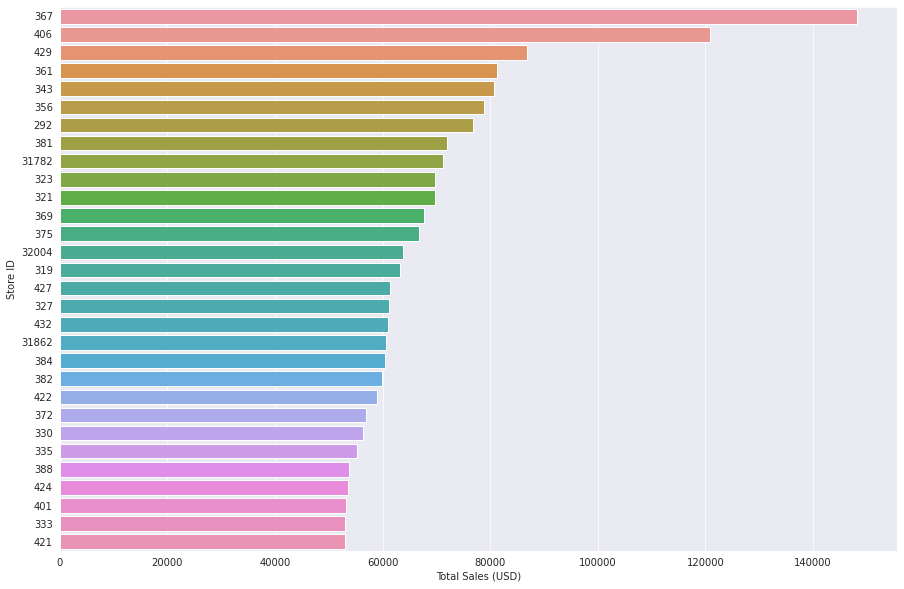

In [36]:
#Top 30 Stores and Bar Char
sales_per_store = dfs["trans_data"].groupby("store_id").sum()["sales_value"].sort_values(ascending=False)
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["Store ID","Total Sales (USD)"])
fig_store = plt.figure(figsize=(15,10))
sns.barplot(y="Store ID",x="Total Sales (USD)", data = sales_per_store[:30],order=sales_per_store[:30]["Store ID"],orient="h")
plt.show()

Stores Number 367 and 406 made the most sales amongst 582 stores with over (USD) 140000 and (USD) 120000 respectively.


Now, we aim to see the top 25 customers based on total purchase amount (USD) is calculated and displayed below. 

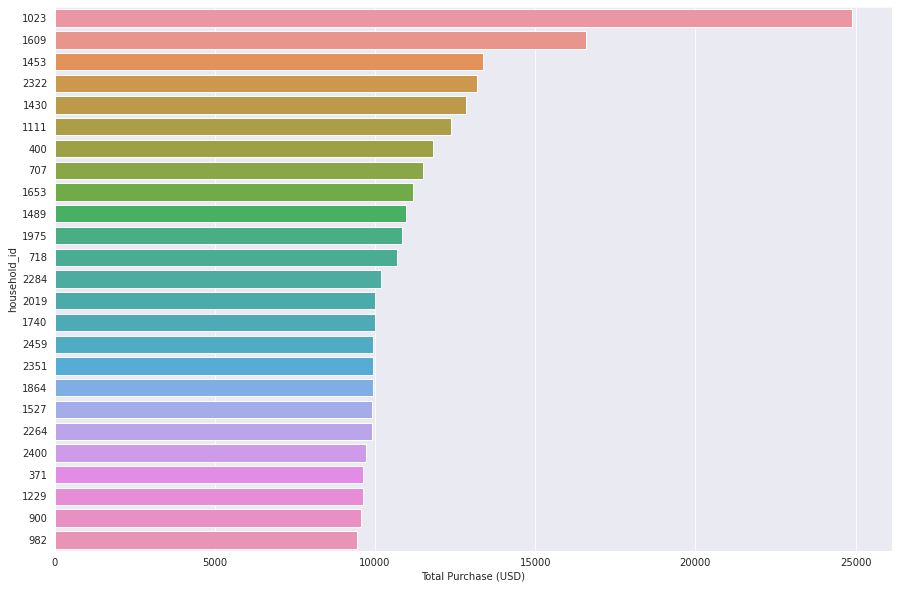

In [37]:
purc_per_cust = dfs["trans_data"].groupby("household_id").sum()["sales_value"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_id","Total Purchase (USD)"])
fig_store = plt.figure(figsize=(15,10))
sns.barplot(y="household_id",x="Total Purchase (USD)",data = purc_per_cust[:25],order=purc_per_cust[:25]["household_id"],orient="h")
plt.show()


Customer with ID number 1023 made the highest sales amount appxorimately (USD 25000), followed by customer with ID number 406 with approximately (USD 17000). 

# DEMOGRAPHICS
Here, we are loading the demographics data which contains household demographical information i.e. age group, marital status and househols size. 

We will be using this data as a base to build our models and possible add features.

After that, the target variable for the churn prediction will be added in the final dataset before moving on to the predictive modelling.

In [0]:
#Reading file from Google Drive
downloaded = drive.CreateFile({'id':'1r7uO5V0LRAPrZ1O4FxyjXtR4EgR5xhix'}) 
downloaded.GetContentFile('demo.csv') 

#Reading Data
dfs["demo"] = pd.read_csv('demo.csv') 

In [0]:
def pie_categorical(data):
    #function to plot the histogram of categorical variables in pie graph
    features = data.columns
    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(15,15))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        data[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=15)
        count += 1

def hist_numeric(data):
    #function to plot the histogram of numeric variables
    features = data.columns
    fig_hists = plt.figure(figsize=(15,15))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        data[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=15)
        count += 1

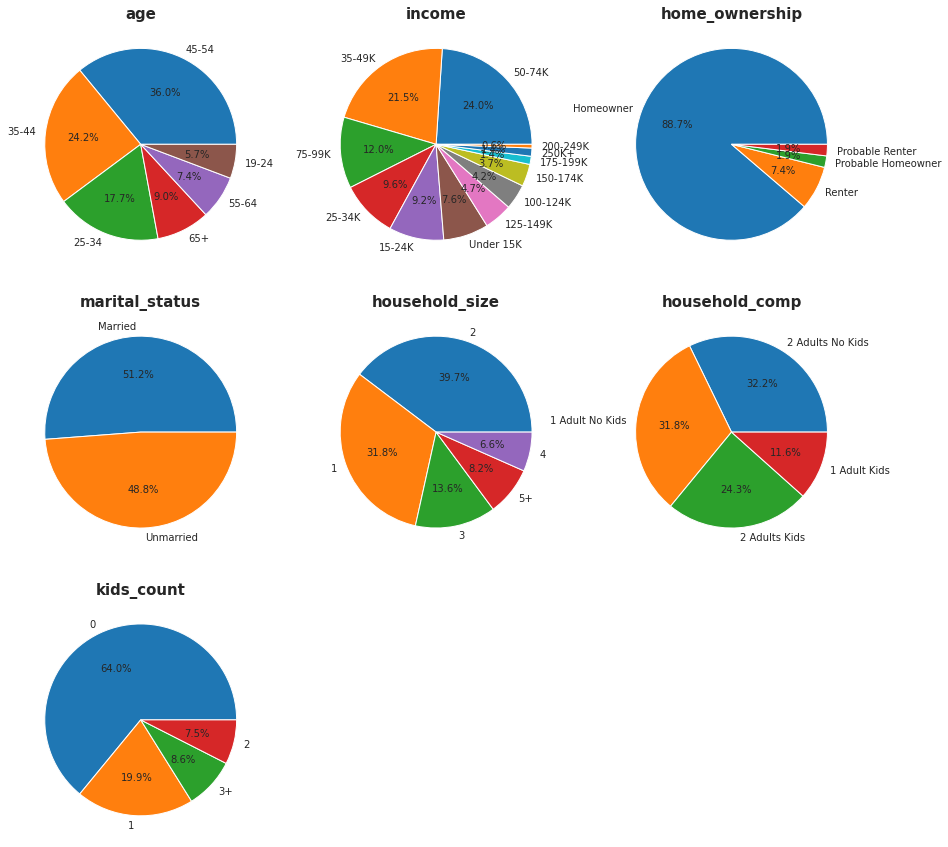

In [41]:
pie_categorical(dfs["demo"].drop("household_id",axis=1))

Since all variables are categorical in the demographics dataset, we will use our _piecategorical function. The pie charts below gives the distribution of each categorical variable in the demographics dataset.

Some interesting findings:

Majority of the customers age in between 35-54 (~60%)
Married couples are almost 3 times the singles
Almost half of the population have a yearly salary between $35-74K
Majority of the customers own a house (63%)
Majority of the customers does not have a child (~70%)

# LOGICAL BASES FOR CHURN PREDICTION 

In the dataset, we have checked and found that there is no explicit churnout feature. Hence, in order to build our model for churnout, we will set criteria and build feature for churnout or not. For this, we have to define our churn out definition.

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.

Churn rate, when applied to a customer base, refers to the proportion of contractual customers or subscribers who leave a supplier during a given time period. It is a possible indicator of customer dissatisfaction, cheaper and/or better offers from the competition, more successful sales and/or marketing by the competition, or reasons having to do with the customer life cycle.

In our analysis, churn the customers who don't redeem an 'n' campaign. For this analysis, when we know which customers have churned we can ask them for reasons and prioritize fixes for them. 

From literaure, a generally accepted retail churn rate is between 5 to 7 percent per year. Less than five percent is a great goal, but a churn rate over ten percent is cause for concern. Even as you acquire more customers, your business can't grow unless you have a greater volume of incoming customers than outgoing ones. Based on one school of thought, satisfying existing customers is actually more profitable than obtaining new ones. For other, it costs five times more to obtain a new customer than it does to retain an existing customer. Therefore, decreasing a churn rate by five percent increases profits up to 125%. 

**For our transactional churn, we consider following things:**
 **-- 1 -- A customer as considered as churned if not purchased from a store 2 weeks or more.**
 **-- 2 -- We are choosing 2 weeks out threshold as it splits households around 90%/10% No Churn/Churn -- shown below.**

Henceforth, we will be focused on the customers who churned out - "IsChurned"

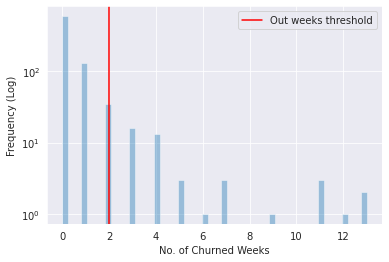

In [42]:
out_weeks_threshold = 2

#weekly customer purchase amount
weekly_purchase = dfs["trans_data"].groupby(["household_id","week"]).sum()["sales_value"]
weekly_purchase = weekly_purchase.unstack()

#customer churned by their last 2 week's purchasing behaviour
#go through all households and calculate out weeks
target = []
common_houses = set(dfs["demo"].household_id) & set(dfs["trans_data"].household_id)
for house in common_houses:
  target.append(53-weekly_purchase.loc[house].dropna().index[-1])

target = pd.DataFrame(list(zip(common_houses,target)),columns=["household_id","No. of Churned Weeks"])
ax = sns.distplot(target["No. of Churned Weeks"],kde=False)
ax.axvline(x=out_weeks_threshold,c="red",label="Out weeks threshold")
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("Frequency (Log)")
plt.show()

In [0]:
#Following the above discussion, we are creating our target variable for modelling where...
            ## Churned - True and... 
                ## Not Churned - False
target["isChurned"] = target["No. of Churned Weeks"]>=out_weeks_threshold
target.drop("No. of Churned Weeks",axis=1,inplace=True)

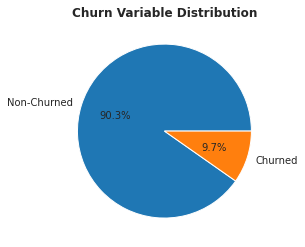

In [44]:
target.isChurned.value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Non-Churned","Churned"])
plt.ylabel("")
plt.title("Churn Variable Distribution",fontweight="bold")
plt.show()

# FEATURE ENGINEERING FOR EXPLANATORY VARIABLE
From here, we will be focused on to generating some features from our CSV files i.e. "camp_d", "trans_data" and "coup_rd".
We will use the data tabulated in those sets to build our churn prediction model.

In [0]:
#FEATURE 01 - The List of Campaigns Received by each Household.

household_per_campaign = dfs["camp_d"].groupby("campaign_id")["household_id"].apply(list)
total_campaigns = len(dfs["camp_d"].campaign_id.unique())
df_camp = pd.DataFrame(np.full((total_households,total_campaigns),0),columns=["Camp_"+str(i) for i in range(1,total_campaigns+1)],index=range(1,total_households+1))
for camp in household_per_campaign.index:
    df_camp.loc[household_per_campaign[camp],"Camp_"+str(camp)] = 1

df_camp["household_id"] = df_camp.index

In [0]:
#FEATURE 02 - The Total Number of Received Campaigns each Household.

temp = dfs["camp_d"].household_id.value_counts().sort_index()
no_of_received_campaigns = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),
                                        columns=["household_id","no_of_received_campaigns"])

Having these two features, we will see if "the number of campaigns received" affects "household's purchase behaviour".

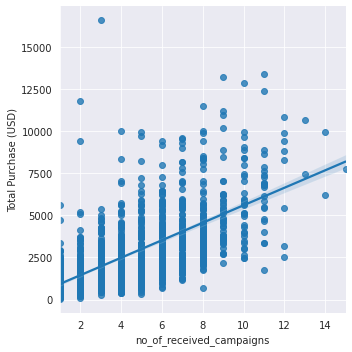

<Figure size 1440x720 with 0 Axes>

In [47]:
#Checking correlation between received campaign and sales
no_of_received_campaigns_vs_sumsales = pd.merge(no_of_received_campaigns,purc_per_cust,on="household_id")
sns.lmplot(x="no_of_received_campaigns",y="Total Purchase (USD)",data=no_of_received_campaigns_vs_sumsales)
plt.show()
fig_store = plt.figure(figsize=(20,10))

Based on the results, the correlation between the number of campaigns received by a household and their total purchase amount is visualised in a scatter plot. 

Linear line in the graph shows the regression model fitted to the scattered data. One can say the aforementioned variables are positively related.

In [48]:
no_of_received_campaigns_vs_sumsales.drop("household_id",axis=1).corr()

,no_of_received_campaigns,Total Purchase (USD)
no_of_received_campaigns,1.000000,0.671353
Total Purchase (USD),0.671353,1.000000


The scatter plot and the correlation value above (67%) indicates that the total purchase amount of a household is positively correlated to the number of campaigns received by them.
A positive sign for consumers

In [0]:
#FEATURE 03 - List of Campaigns which were redeemed.
temp = dfs["coup_rd"].groupby("household_id")["campaign_id"].apply(list)
rede_camp_history_per_household = pd.DataFrame(list(zip(temp.index,temp.values)),
                                               columns=["household_id","redeemed_campaign_id_list"])

In [0]:
#FEATURE 04 - The number of redemptions by each Household
temp = dfs["coup_rd"].household_id.value_counts().sort_index()
no_of_rede_per_household = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),
                                        columns=["household_id","no_of_redeems"])

In [0]:
#FEATURE 05 - Most Frequent Campaigns Type [ (A,B,C) ] received by each Household.
camp_list = dfs["camp_d"].groupby("household_id")["campaign_type"].apply(list)
most_freq_type = pd.DataFrame(list(zip(camp_list.index,
                                       [pd.Series(i).value_counts().idxmax() for i in camp_list])),
                              columns=["household_id","most_freq_camp_type"])

In [0]:
#FEATURE 06 - Top 30 stores with high number of churnout OR in other words, Households which have more high out weeks.
store_per_house = dfs["trans_data"].groupby("household_id")["store_id"].apply(list).apply(np.unique)

churn_houses = set(target.household_id[target.isChurned == True].sort_values().values) & set(dfs["demo"].household_id.unique())
churn_stores = []
for i in churn_houses:
  churn_stores.extend(store_per_house[i])

churn_stores = pd.Series(churn_stores).value_counts()/len(churn_houses)

df_store = dfs["trans_data"].groupby(["store_id","household_id"]).count()["basket_id"].unstack("store_id")
df_store.replace(np.nan,0,inplace=True)
df_store[df_store>0] = 1

#select the top stores with high number of churners
df_store = df_store.loc[:,churn_stores.index[:30]]
df_store.columns=["Store_"+str(i) for i in df_store.columns]

In [0]:
#FEATURE 7 - Amount of purchase of a household within two years.
purc_per_cust = dfs["trans_data"].groupby("household_id").sum()["sales_value"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_id","Total Purchase (USD)"])

In [0]:
#Generate the final dataframe Wwhich we will use predictive modelling

pml = pd.merge(dfs["demo"],df_camp,on="household_id",how="left")
pml = pd.merge(pml,no_of_received_campaigns,on="household_id",how="left")
pml = pd.merge(pml,no_of_rede_per_household,on="household_id",how="left")
pml = pd.merge(pml,df_store,on="household_id",how="left")
pml = pd.merge(pml,purc_per_cust,on="household_id",how="left")
pml = pd.merge(pml,target,on="household_id",how="left")
pml = pd.merge(pml,most_freq_type,on="household_id",how="left")

In [0]:
#Saving the data file for any loss -NW -
pml.to_csv (r'D:/Studies -/MIMBA/1st Year/4th Module/Practical Machine Learning/Final_Mergee.csv', index = False, header=True)

In [0]:
#Reading file from Google Drive
downloaded = drive.CreateFile({'id':'1xWAvXH3esgF9EieJFBHWnLqPFruPlXRK'}) 
downloaded.GetContentFile('Final_Merge.csv') 

#Reading Data
dfs["pml"] = pd.read_csv('Final_Merge.csv') 

In [57]:
#Checking Dataset - wrt rows and column
pml.shape

(801, 70)

In [58]:
#Checking types and number of features
pml.dtypes.value_counts()

float64    33
int64      28
object      8
bool        1
dtype: int64

In [59]:
#Tabulating the data
pml.head()

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,Camp_10,Camp_11,Camp_12,Camp_13,Camp_14,Camp_15,Camp_16,Camp_17,Camp_18,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27,no_of_received_campaigns,no_of_redeems,Store_367,Store_31862,Store_381,Store_375,Store_317,Store_388,Store_433,Store_412,Store_432,Store_396,Store_446,Store_319,Store_450,Store_369,Store_330,Store_31582,Store_402,Store_292,Store_34011,Store_31642,Store_372,Store_445,Store_335,Store_329,Store_400,Store_316,Store_318,Store_361,Store_363,Store_296,Total Purchase (USD),isChurned,most_freq_camp_type
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,8.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2415.56,False,Type B
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,3.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2558.82,False,Type A
2,1003,35-44,25-34K,NaN,Unmarried,1,1 Adult No Kids,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1404.43,True,Type A
3,1004,25-34,15-24K,NaN,Unmarried,1,1 Adult No Kids,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2486.93,False,Type A
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4483.35,False,Type A


In [60]:
#We have also used boolean masks to check if there are any missing data 
pml.isnull()

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,Camp_10,Camp_11,Camp_12,Camp_13,Camp_14,Camp_15,Camp_16,Camp_17,Camp_18,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27,no_of_received_campaigns,no_of_redeems,Store_367,Store_31862,Store_381,Store_375,Store_317,Store_388,Store_433,Store_412,Store_432,Store_396,Store_446,Store_319,Store_450,Store_369,Store_330,Store_31582,Store_402,Store_292,Store_34011,Store_31642,Store_372,Store_445,Store_335,Store_329,Store_400,Store_316,Store_318,Store_361,Store_363,Store_296,Total Purchase (USD),isChurned,most_freq_camp_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
798,False,False,False,False,False,False,False,False,False,False,Fal

In [62]:
#Based on checking the new data set, we have missing values for our data, hence, we need to take care of it. 
#For simplicity, we are checking which feature has data missing 
[col for col in pml.columns if pml[col].isnull().any()]

['home_ownership',
 'marital_status',
 'no_of_received_campaigns',
 'no_of_redeems',
 'most_freq_camp_type']

In [63]:
#store number of missing values per column as Series object as GM1
pmll = pml.isnull().sum()

#filter out and sort columns with missing value
pmll[pmll>=0].sort_values(ascending=False)

#the same in percentages
pmll[pmll>0].sort_values(ascending=False) / len(pml) * 100

no_of_redeems               63.171036
home_ownership              29.088639
marital_status              17.103620
most_freq_camp_type          5.617978
no_of_received_campaigns     5.617978
dtype: float64

As we can see, No of Redeems is having 63% missing values. We need to take care of missing variables

In [0]:
#Taking care of missing values and change NaN or None/Unknown values to zero...
            ##for the columns of "number of received campaigns" and the "number of redeems".
pml.kids_count.replace(["3+"],[3],inplace=True)
pml.kids_count = pml.kids_count.astype(int)    
pml.no_of_received_campaigns.replace(np.nan,0,inplace=True)
pml.no_of_received_campaigns = pml.no_of_received_campaigns.astype(int)
pml.no_of_redeems.replace(np.nan,0,inplace=True)

In [65]:
#Checking the New Dataset -- #We don't have any missing values
pml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   household_id              801 non-null    int64  
 1   age                       801 non-null    object 
 2   income                    801 non-null    object 
 3   home_ownership            568 non-null    object 
 4   marital_status            664 non-null    object 
 5   household_size            801 non-null    object 
 6   household_comp            801 non-null    object 
 7   kids_count                801 non-null    int64  
 8   Camp_1                    801 non-null    int64  
 9   Camp_2                    801 non-null    int64  
 10  Camp_3                    801 non-null    int64  
 11  Camp_4                    801 non-null    int64  
 12  Camp_5                    801 non-null    int64  
 13  Camp_6                    801 non-null    int64  
 14  Camp_7    

In [66]:
pml.head()

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,Camp_10,Camp_11,Camp_12,Camp_13,Camp_14,Camp_15,Camp_16,Camp_17,Camp_18,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27,no_of_received_campaigns,no_of_redeems,Store_367,Store_31862,Store_381,Store_375,Store_317,Store_388,Store_433,Store_412,Store_432,Store_396,Store_446,Store_319,Store_450,Store_369,Store_330,Store_31582,Store_402,Store_292,Store_34011,Store_31642,Store_372,Store_445,Store_335,Store_329,Store_400,Store_316,Store_318,Store_361,Store_363,Store_296,Total Purchase (USD),isChurned,most_freq_camp_type
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2415.56,False,Type B
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2558.82,False,Type A
2,1003,35-44,25-34K,NaN,Unmarried,1,1 Adult No Kids,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1404.43,True,Type A
3,1004,25-34,15-24K,NaN,Unmarried,1,1 Adult No Kids,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2486.93,False,Type A
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4483.35,False,Type A


In [0]:
#Change other object type elements in the columns to integer for modeling purpose

pml.household_size.replace("5+",5,inplace=True)
pml.household_size = pml.household_size.astype(int)
pml["Total Purchase (USD)"] = pml["Total Purchase (USD)"].astype(int)

#Now We are checking how our features interact with the target variable.


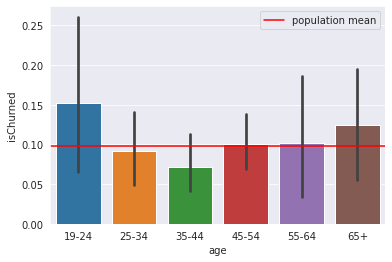

In [68]:
ax = sns.barplot(x="age",y="isChurned",data=pml,order=["19-24","25-34","35-44","45-54","55-64","65+"])
ax.axhline(y=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Households within the age of **35-44** tend to churn less then the rest of other age groups
It also indicates that age group of **19-24** tend to churn more.

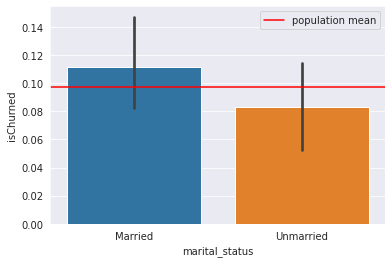

In [69]:
ax = sns.barplot(x="marital_status",y="isChurned",data=pml,order=["Married","Unmarried"])
ax.axhline(y=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Marital Status vs Churn Rate:

Married couples tend to churn more compared to singles; they seems to increase the churn rate of the whole of the population

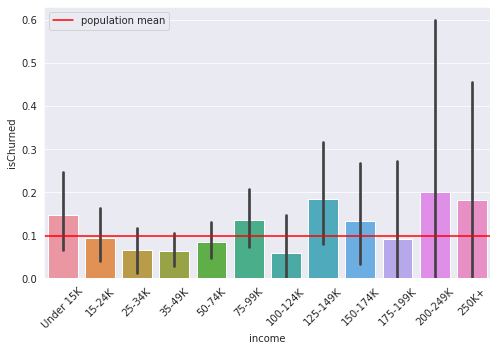

In [70]:
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x="income",y="isChurned",data=pml,
                 order=["Under 15K","15-24K","25-34K","35-49K","50-74K","75-99K","100-124K","125-149K","150-174K","175-199K","200-249K","250K+"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.axhline(y=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Income vs Churn Rate:

Based on the results, households whose income are higher churnout more. People from the following bracket churn more often:
1.   Under 15k
2.   125k-149k
3.   200-249k
4.   250k and over






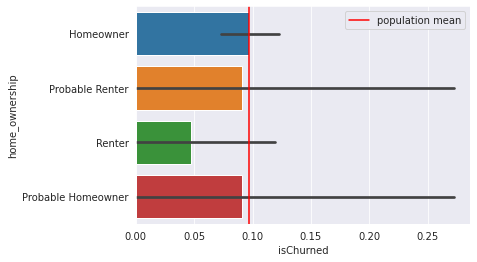

In [71]:
ax = sns.barplot(y="home_ownership",x="isChurned",data=pml,orient="h")
ax.axvline(x=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Home Ownership vs Churn Rate:

Households who own a home churnout more. 

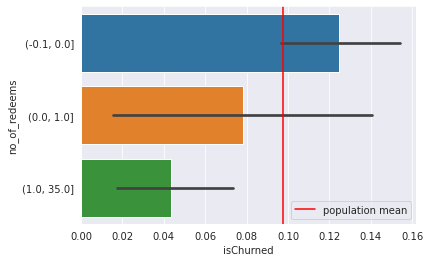

In [72]:
ax = sns.barplot(y=pd.cut(pml.no_of_redeems,bins=[-0.1,0,1,35],duplicates="drop"),x="isChurned",data=pml,orient="h")
ax.axvline(x=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Number of Redeems vs Churn Rate:

We have grouped our data based on household's number of redeems. We will use pandas.cut which groups the number of redeems into the bins. Graph below separates 0 redeemers, redeemed once and the final group redeemed more than once:
> Churn rate decreases as the number of redeems increase







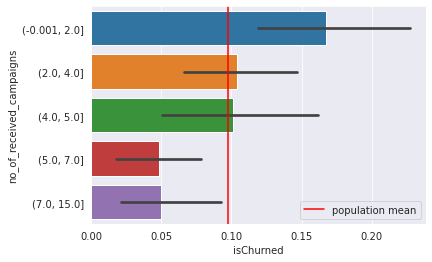

In [73]:
ax = sns.barplot(y=pd.qcut(pml.no_of_received_campaigns,5,duplicates="drop"),x="isChurned",data=pml,orient="h")
ax.axvline(x=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Churn rate vs Number of campaigns received by a household

Churn rate decreases as the number of campaigns received by a household increases

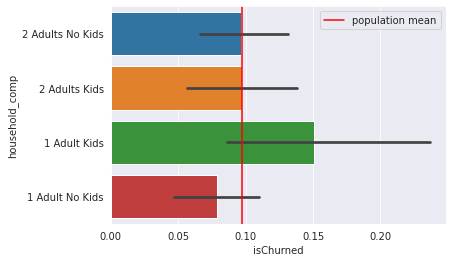

In [74]:
ax = sns.barplot(y="household_comp",x="isChurned",data=pml,orient="h",order=['2 Adults No Kids','2 Adults Kids','1 Adult Kids','1 Adult No Kids'])
ax.axvline(x=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Not very clear, however churn rate tends to increase when household have 1 adult kid

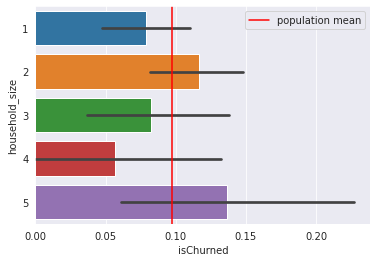

In [75]:
ax = sns.barplot(y="household_size",x="isChurned",data=pml,orient="h")
ax.axvline(x=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Churn rate tends to decrease as the number of family members increases but it sharply increase when household has 5 or more members.

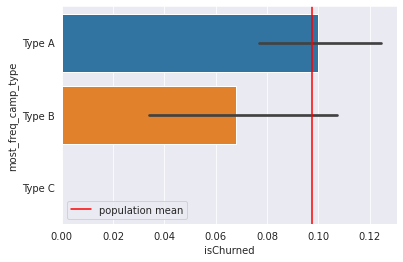

In [76]:
ax = sns.barplot(y="most_freq_camp_type",x="isChurned",data=pml,orient="h",order=['Type A','Type B','Type C'])
ax.axvline(x=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Campaign Type vs Churn rate:

TypeC campaign fails as all households which was approached with campaign C are churned. However note that it has extremely lower sample size (1% of all population)
TypeB is the most successful one with the lowest churn rate

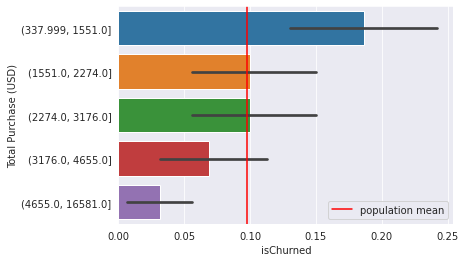

In [77]:
ax = sns.barplot(y=pd.qcut(pml["Total Purchase (USD)"],5,duplicates="drop"),x="isChurned",data=pml,orient="h")
ax.axvline(x=pml.isChurned.sum()/len(pml),c="red",label="population mean")
ax.legend()
plt.show()

Total purchase of a household vs Churn rate:

Total purchase amount of a customer is a clear separator, expected to perform well as a feature in the churn prediction model
Churn rate decreases as total amount of purchase of a household (within 2 years) increases

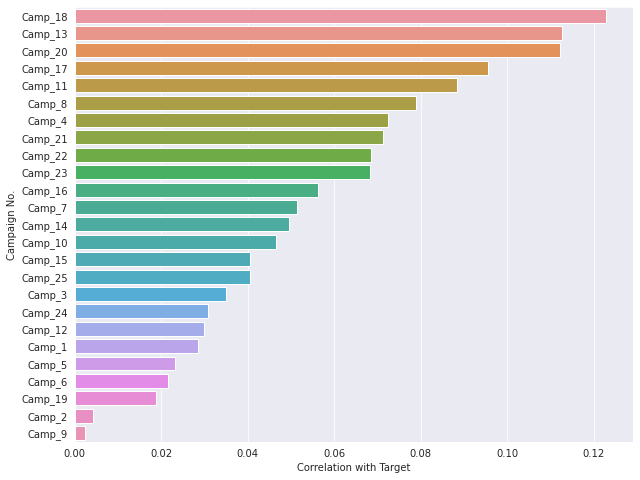

In [78]:
corrs = abs(pml[["Camp_"+str(i) if i<26 else "isChurned" for i in range(1,27)]].corr()["isChurned"])
corrs.drop("isChurned",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Campaign No.","Correlation with Target"]).sort_values(by="Correlation with Target",ascending=False)
fig_store = plt.figure(figsize=(10,8))
sns.barplot(y="Campaign No.",x="Correlation with Target",data = corrs,orient="h")
plt.show()

Correlation between Campaign Number and the Target (isChurned) are calculated and displayed in the barchart below:

Campaign 18 as a feature expected to be performing well in the model as it has the highest correlation with the target variable; followed by Campaign 13 and 20.

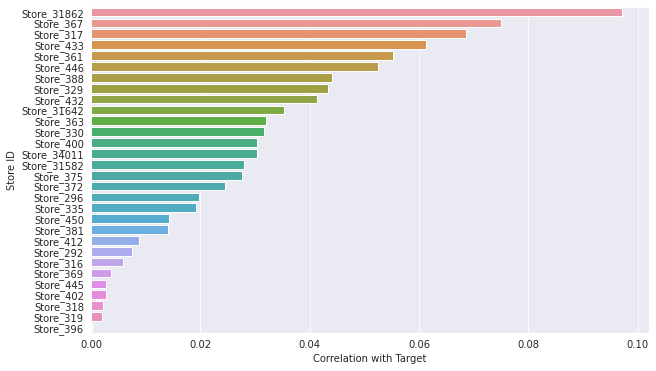

In [79]:
cols =list(df_store.columns)
cols.extend(["isChurned"])
corrs = abs(pml[cols].corr()["isChurned"])
corrs.drop("isChurned",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Store ID","Correlation with Target"]).sort_values(by="Correlation with Target",ascending=False)
fig_store = plt.figure(figsize=(10,6))
sns.barplot(y="Store ID",x="Correlation with Target",data = corrs,orient="h")
plt.show()


Correlation between the stores with high number of churner customers and the Target (isChurned) are calculated and displayed in the barchart above.

#ML Model Training & Testing
In this section we will train a Machine Learning model with the training data. The machine learning model is chosen as XGBoost (Extreme Gradient Boosting) as they are known to be performing well with imbalanced datasets.

In [80]:
pip install xgboost

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

We will transform our categorical variables using one-hot encoding algorithm (get_dummies) to be able to use in our classifier. 

After we will separat the data into train and test 75%/25%. Then generated an XGBoost classifier with it's default parameters and trained it with the training set.

Now let's test our trained classifier with test data:

In [82]:
#one hot encoding categorical data for modelling
encoded = pd.get_dummies(pml[pml.columns[pml.dtypes==object]])
data_encoded = pd.concat([encoded, pml[pml.columns[pml.dtypes != object]]],axis=1)

#Features (X) and the target (y)
X = data_encoded.drop("isChurned",axis=1)
y = data_encoded.isChurned

#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Train Data Classification Report:

              precision    recall  f1-score   support

       False       0.93      1.00      0.97       544
        True       1.00      0.30      0.47        56

    accuracy                           0.94       600
   macro avg       0.97      0.65      0.72       600
weighted avg       0.94      0.94      0.92       600

Test Data Classification Report:

              precision    recall  f1-score   support

       False       0.89      0.99      0.94       179
        True       0.00      0.00      0.00        22

    accuracy                           0.88       201
   macro avg       0.44      0.49      0.47       201
weighted avg       0.79      0.88      0.83       201



[Text(33.0, 0.5, 'real values'),
 Text(0.5, 15.0, 'predicted values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

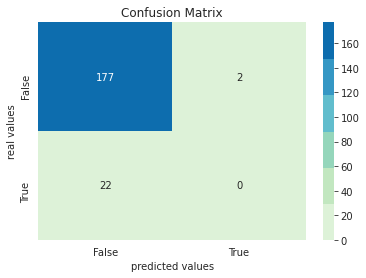

In [84]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [84]:
roc_auc_score(y_test,y_pred)
# average_precision_score(y_test,y_pred)

0.4947089947089947

Even though accuracy for the test set is 88% it maybe misleading as our target variable is skewed towards not churned (90% are not churned). Even a very basic model which selects majority class all times would score 90% accuracy.

Therefore we will have to focus on how well our model performs on the minority class (churned households). On the test set we have 201 samples only 23 of them being churned. Our model could not manage to detect any of them, therefore test set recall has come out as 0%. This is the part we need to aim to increase.

We will lets try to enhance our model by optimising hyperparameters by using "Randomised Search" with "Cross-Validation".

We need to determine the evaluation criteria (scorer) to be optimised for the Randomised Search. Lets see the available scorers.

average precision, balanced accuracy, roc_auc, f1 are the scorers which are commonly used for imbalanced dataset classifications as they handle situation well as compared to other metrics


In [85]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [86]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV

#handle class imbalance problem by undersampling (not used)
# no_churn_down_sampled = data_encoded[data_encoded.isChurned == False].sample(sum(data_encoded.isChurned))
# data_encoded_balanced = pd.concat([no_churn_down_sampled,data_encoded[data_encoded.isChurned]])
#shuffle the dataset to avoiding sampling biases
# data = data_encoded_balanced.sample(frac=1)

#shuffle the dataset to avoiding sampling biases
data = data_encoded.sample(frac=1)
X = data.drop("isChurned",axis=1)
y = data.isChurned

#generate an XGB classifier
mdl = XGBClassifier()

#parameter ranges
param_list = {
    'silent': [False],
    'max_depth': range(2,51),
    'learning_rate': [0.001, 0.01, 0.1, 0.15],
    'subsample': np.arange(0,1.1,.1),
    'colsample_bytree': np.arange(0,1.1,.1),
    'colsample_bylevel': np.arange(0,1.1,.1),
    'min_child_weight': [0.5, 0.7, 1.0, 2.0, 3.0],
    'gamma': [0, 0.25, 0.5, 0.75, 0.9, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0],
    'n_estimators': [2, 5, 10, 20, 50, 100],
    'scale_pos_weight': [1, 1.5, 2, 6, 6.1, 6.3, 6.5, 8],
    'max_delta_step': [1, 2, 3, 5, 10]
}

kfold = 5
cv_strat = RepeatedStratifiedKFold(n_splits=kfold,n_repeats=10)

#Randomized Search
# cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="roc_auc",n_jobs=-1).fit(X.values,y.values)
cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="balanced_accuracy",n_jobs=-1).fit(X.values,y.values)
# cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="average_precision",n_jobs=-1).fit(X.values,y.values)

#use the best estimator after the hyperparameter optimisation
mdl_best = cv.best_estimator_

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1194 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 2527 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4264 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  3.3min finished


In [87]:
cv.best_params_

{'colsample_bylevel': 0.4,
 'colsample_bytree': 0.9,
 'gamma': 1.0,
 'learning_rate': 0.01,
 'max_delta_step': 1,
 'max_depth': 11,
 'min_child_weight': 2.0,
 'n_estimators': 50,
 'reg_lambda': 1000.0,
 'scale_pos_weight': 8,
 'silent': False,
 'subsample': 0.8}

Hyperparameter optimisation is completed. Now lets train and test the XGBoost Classifier with the optimised hyperparameters.

'scale_pos_weight' is the parameter used for biasing (weighing more) of the minority class samples. The higher the value the more bias towards minority class. In our dataset, the ratio between majority class samples and the minority class is 8 which coheres with this parameter (optimised value came out as 8).

Lets test our optimised model with the data

In [88]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

cv_strat = RepeatedStratifiedKFold(n_splits=kfold,n_repeats=20)
scores = cross_validate(mdl_best,X.values,y.values,cv=cv_strat,verbose=3,n_jobs=-1,return_train_score=True,
                        scoring={"roc_auc":"roc_auc",
                                 "recall":"recall",
                                 "precision":"precision",
                                 "accuracy":"accuracy",
                                 "balanced_accuracy":"balanced_accuracy",
                                 "average_precision":"average_precision"}) 

pd.DataFrame(pd.DataFrame(scores).mean(),columns=["Score"]).drop(["fit_time","score_time"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.7s finished


,Score
test_roc_auc,0.624990
train_roc_auc,0.760129
test_recall,0.352625
train_recall,0.508169
test_precision,0.160371
train_precision,0.223336
test_accuracy,0.751816
train_accuracy,0.776918
test_balanced_accuracy,0.573760
train_balanced_accuracy,0.657039


Even though getting lower accuracy in total, now we are getting much better results for the minority class as recall and ROC AUC (receiver operating characteristics, area under curve) increased significantly.

The score table above gives all metric results for both test and train sets. Train and test results are close which is an indication that our model did not overfit.

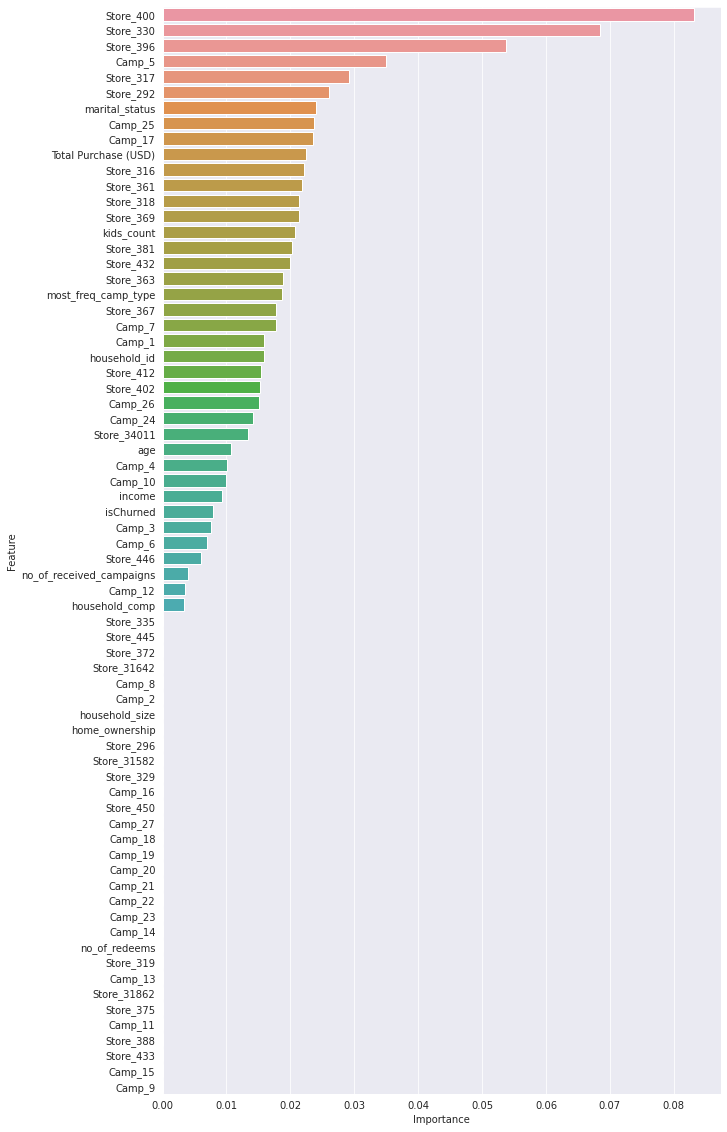

In [89]:
feat_imp = pd.DataFrame(list(zip(pml.columns,mdl_best.feature_importances_)),columns=["Feature","Importance"]).sort_values(by="Importance",ascending=False)
fig_store = plt.figure(figsize=(10,20))
sns.barplot(y="Feature",x="Importance",data = feat_imp,orient="h")

We checked parameters were more important to separate churners/non churners. The barchart below list the features ordered by their importance values for the XGB Classifier.


In [90]:
print(xgb_mdl.feature_importances_)

[0.01101225 0.0351884  0.01043925 0.01489058 0.         0.04226549
 0.         0.         0.         0.         0.         0.
 0.00924569 0.         0.02391339 0.         0.01758165 0.03699317
 0.02965774 0.         0.         0.         0.01705612 0.02244395
 0.02984479 0.01706023 0.         0.         0.00962006 0.01221498
 0.         0.02198311 0.03606382 0.01128891 0.         0.
 0.         0.01529497 0.01398276 0.02077629 0.         0.01904282
 0.00541074 0.         0.         0.01149465 0.0084902  0.
 0.         0.01594    0.02167848 0.01713865 0.         0.01093121
 0.02003806 0.         0.02245258 0.         0.         0.
 0.02247793 0.01870165 0.02509864 0.0105854  0.03806762 0.01706516
 0.02102347 0.0102477  0.02713017 0.01759718 0.01466864 0.
 0.00337451 0.02881123 0.         0.         0.         0.00658952
 0.         0.         0.         0.         0.         0.
 0.00716178 0.         0.01528426 0.         0.01582078 0.02175312
 0.04054194 0.         0.         0.0265642

# LOGISTIC REGRESSION


In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() #default solver 'lbfgs', L2 penalty, C=1

In [0]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #zero-mean, unit variance normalization     
X_scaled = std_scaler.fit_transform(X)

In [93]:
#flatten the target vector for cv
y = y.values.ravel()
clf.fit(X_scaled,y) #fit the Logistic Model on our dataset
clf.score(X_scaled,y) #accuracy score for training dataset

0.9088639200998752

In [94]:
from sklearn.model_selection import cross_val_score
sc = cross_val_score(clf, X_scaled, y, cv=5) #default stratified 5-fold cross-validation
print("Mean cv accuracy score (logit, L2, C=1): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (logit, L2, C=1): 0.8627


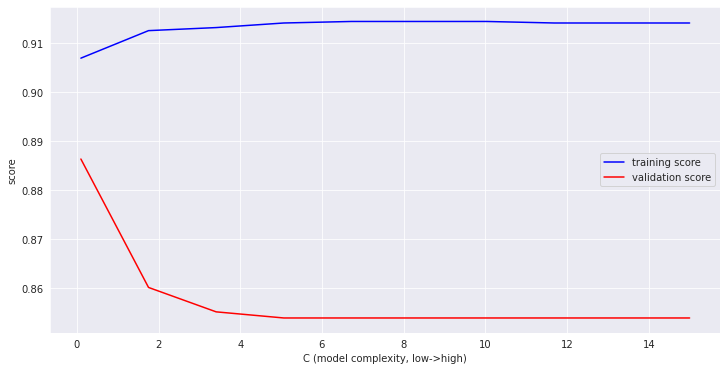

In [95]:
from sklearn.model_selection import validation_curve
c_vals = np.linspace(0.1,15,10) #regularization parameter values
train_scores, valid_scores = validation_curve(clf, X_scaled, y,"C",c_vals,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=[12,6])
plt.plot(c_vals, train_scores_mean, color='blue', label='training score')
plt.plot(c_vals, valid_scores_mean, color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('C (model complexity, low->high)')
plt.ylabel('score');

In [96]:
clf = LogisticRegression(C=1.8)
clf.fit(X_scaled,y) #fit the Logistic Model on our dataset
clf.score(X_scaled,y) #accurcy score for training dataset

0.9088639200998752

In [97]:
sc = cross_val_score(clf, X_scaled, y, cv=5) #default stratified 5-fold cross-validation
print("Mean cv accuracy score (logit, L2, C=1.8): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (logit, L2, C=1.8): 0.8602
